In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import statsmodels.api as sm

plt.style.use('fivethirtyeight')

In [13]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10



\begin{equation}
X_t = T_t + S_t + C_t + \epsilon_t
\end{equation}

Dedicated notebook: [https://www.kaggle.com/konradb/practical-time-series-pt-1-the-basics](https://www.kaggle.com/konradb/practical-time-series-pt-1-the-basics)

The first we can do to identify patterns in a time series is separate it into components with easily understandable characteristics:

\begin{equation}
X_t = T_t + S_t + C_t + I_t \quad
\end{equation}

where:
* $T_t$: the trend shows a general direction of the time series data over a long period of time. It represents a long-term progression of the series (secular variation)

* $S_t$: the seasonal component with fixed and known period. It is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors: annual, monthly or weekly. Obvious examples include daily power consumption patterns or annual sales of seasonal goods.

* $C_t$: (optional) cyclical component is a repetitive pattern which does not occur at fixed intervals - usually observed in an economic context like business cycles.

* $I_t$: the irregular component (residuals ) consists of the fluctuations in the time series that are observed after removing trend and seasonal / cyclical variations.

In [3]:
os.getcwd()

'/home/noone/data-exercises/TimeSeries'

In [7]:
df = pd.read_csv("us_energy.csv")
df.head(3)

,date,value
0,1973-01-01,160.218
1,1973-01-31,143.539
2,1973-03-02,148.158


In [9]:
# Make sure we can represent it as a time series
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

KeyError: 'date'

<AxesSubplot:xlabel='date'>

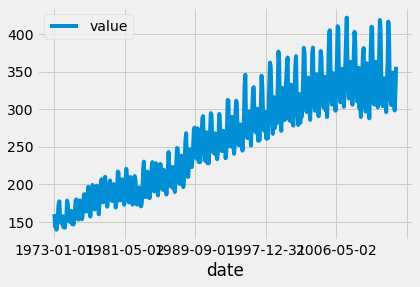

In [10]:
df.plot()

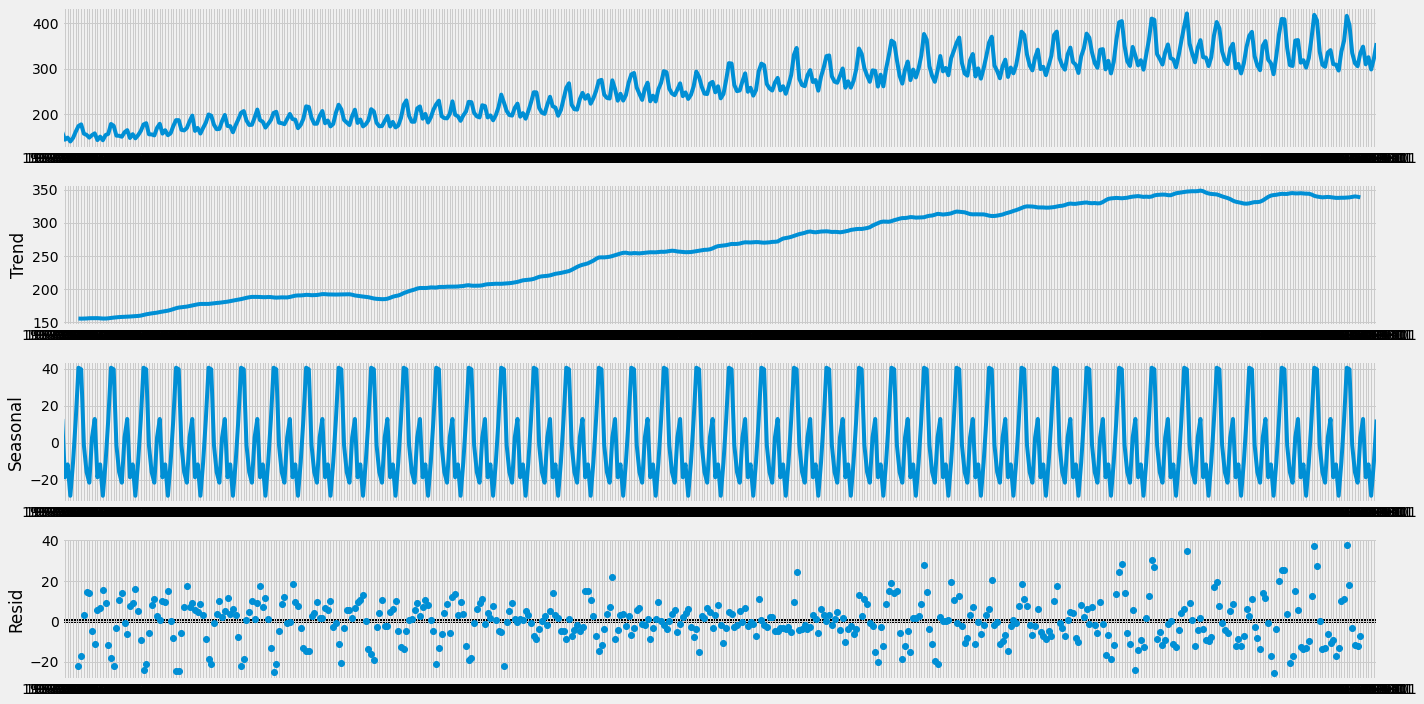

In [14]:
# Wrapper around the functionality in order to decompose trend and seasonal components
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

decomposition = seasonal_decompose(df, period = 12)
figure = decomposition.plot()
plt.show()

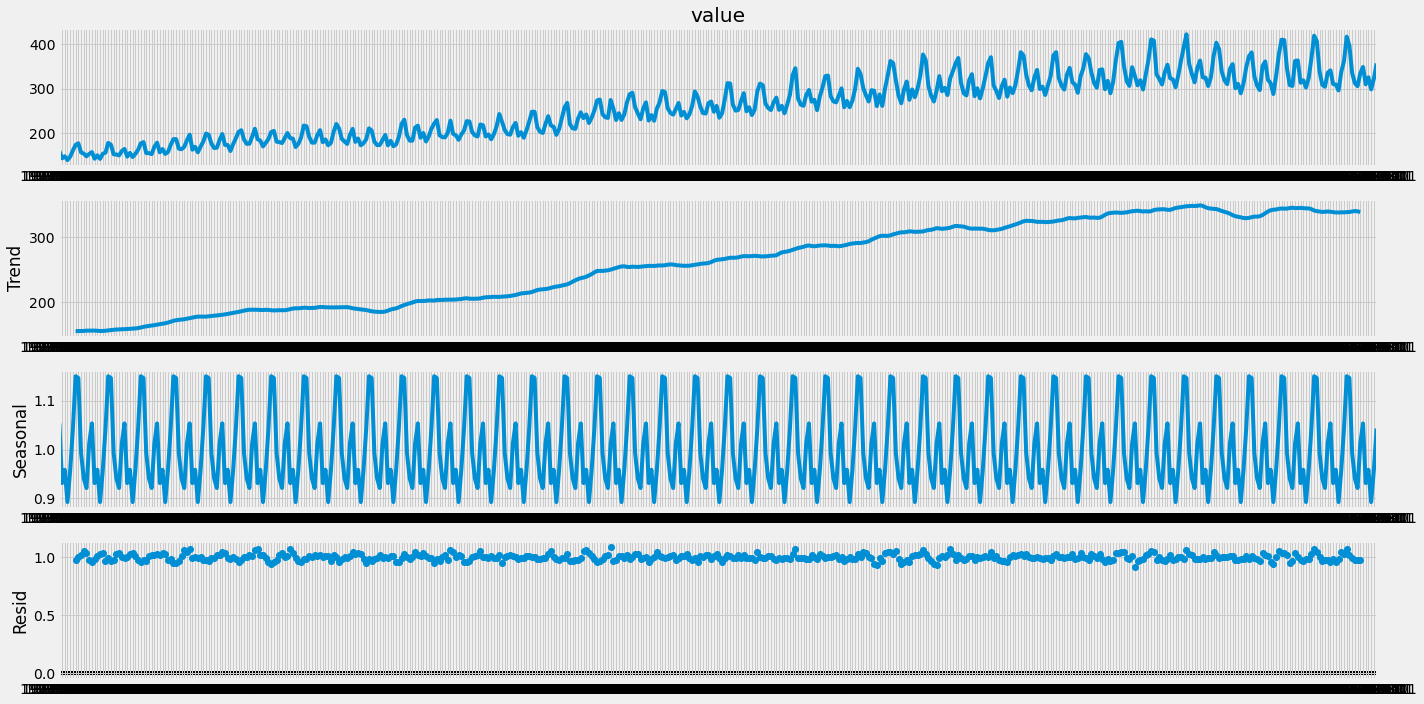

In [15]:
# Residual is the stuff the model can't figure out
# The residual gets higher spread as the series progresses, this can indicate that the model is not summative but multiplicative. Let's try it.
# If it's a warm day the sales of cold drinks increases x10000 (additive), if I expect to jump by x5 (multiplicative)
decomposition = seasonal_decompose(df['value'], period = 12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

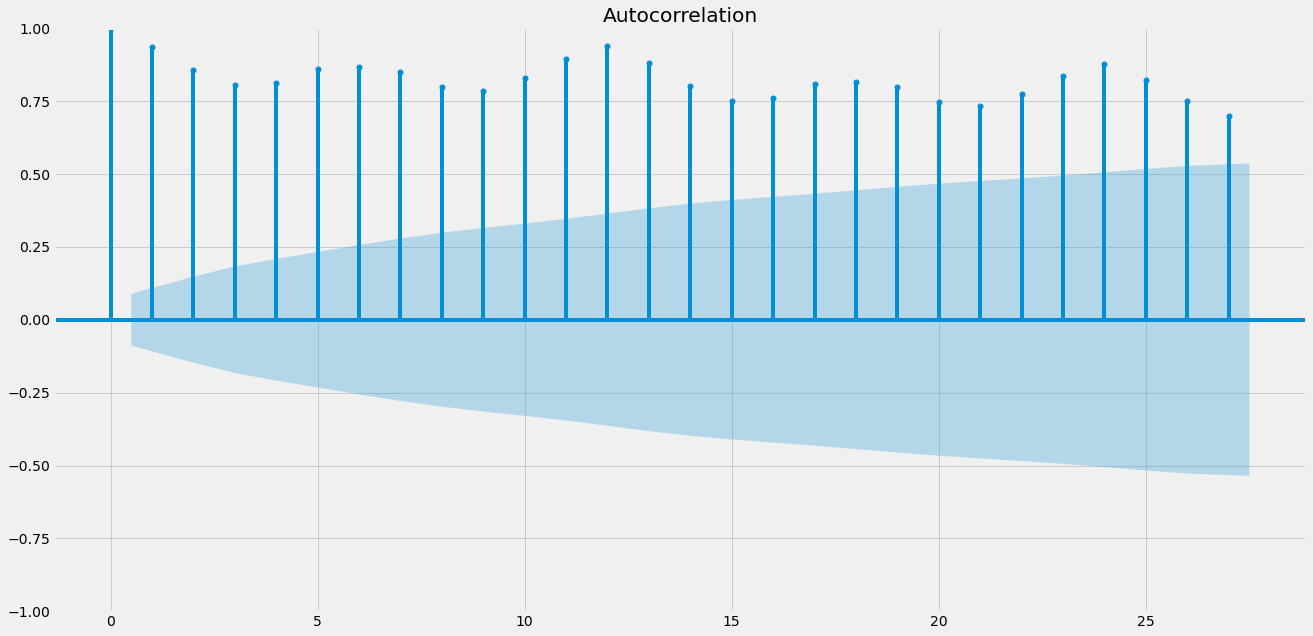

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plot_acf(df['value'])
print()

/home/noone/miniconda3/envs/pytorch/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


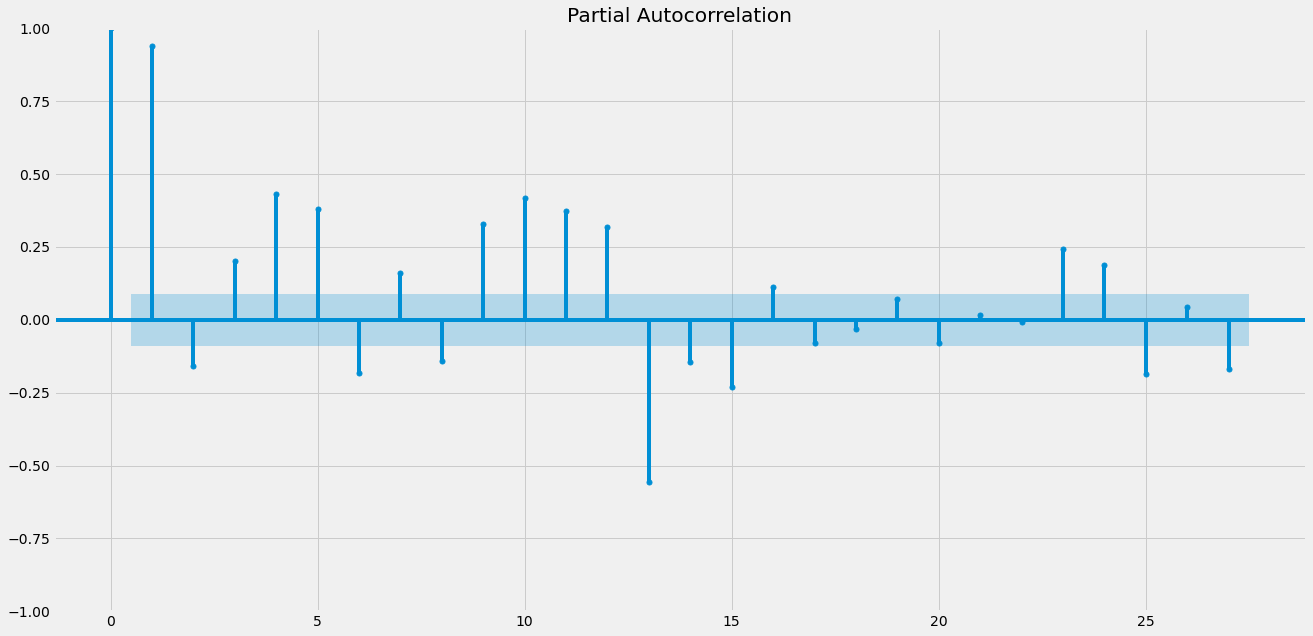

In [19]:
plot_pacf(df['value'])
print()

Dedicated notebook: [https://www.kaggle.com/konradb/practical-time-series-pt-2-smoothing-methods](https://www.kaggle.com/konradb/practical-time-series-pt-2-smoothing-methods)

In [21]:
# training / validation split
cutoff_date = '2005-12-31'
df['value'] /= 100
xtrain, xvalid = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(xtrain['value'].values, seasonal_periods= 12, trend= 'mul', seasonal= 'mul')

In [23]:
fit1 = fit1.fit()

In [24]:
prediction = fit1.forecast(len(xvalid)).copy()

xresiduals = xvalid['value'] - prediction

In [25]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.287854,True
smoothing_trend,beta,0.019188,True
smoothing_seasonal,gamma,0.237381,True
initial_level,l.0,0.015102,True
initial_trend,b.0,1.000385,True
initial_seasons.0,s.0,1.064529,True
initial_seasons.1,s.1,0.929952,True
initial_seasons.2,s.2,0.973652,True
initial_seasons.3,s.3,0.910440,True
initial_seasons.4,s.4,0.962007,True


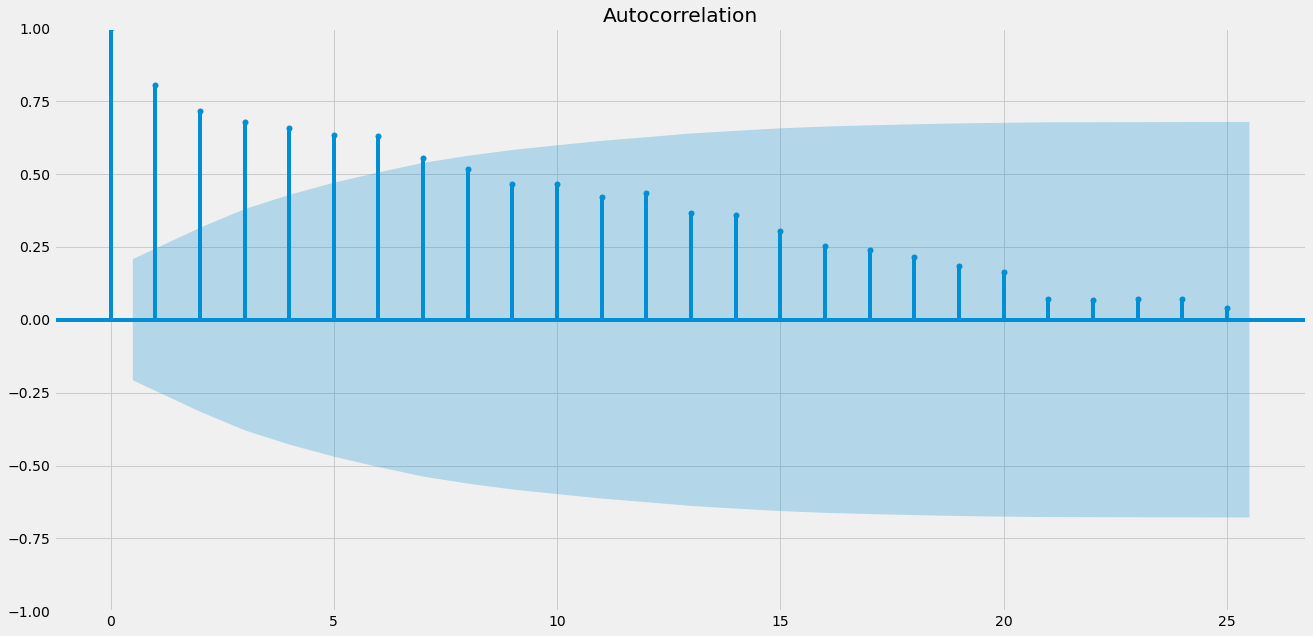

In [27]:
# alpha smoothing model
# beta smoothing trend
# gamma smoothing seasonality

plot_acf(xresiduals, lags = 25)
print()

/home/noone/miniconda3/envs/pytorch/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


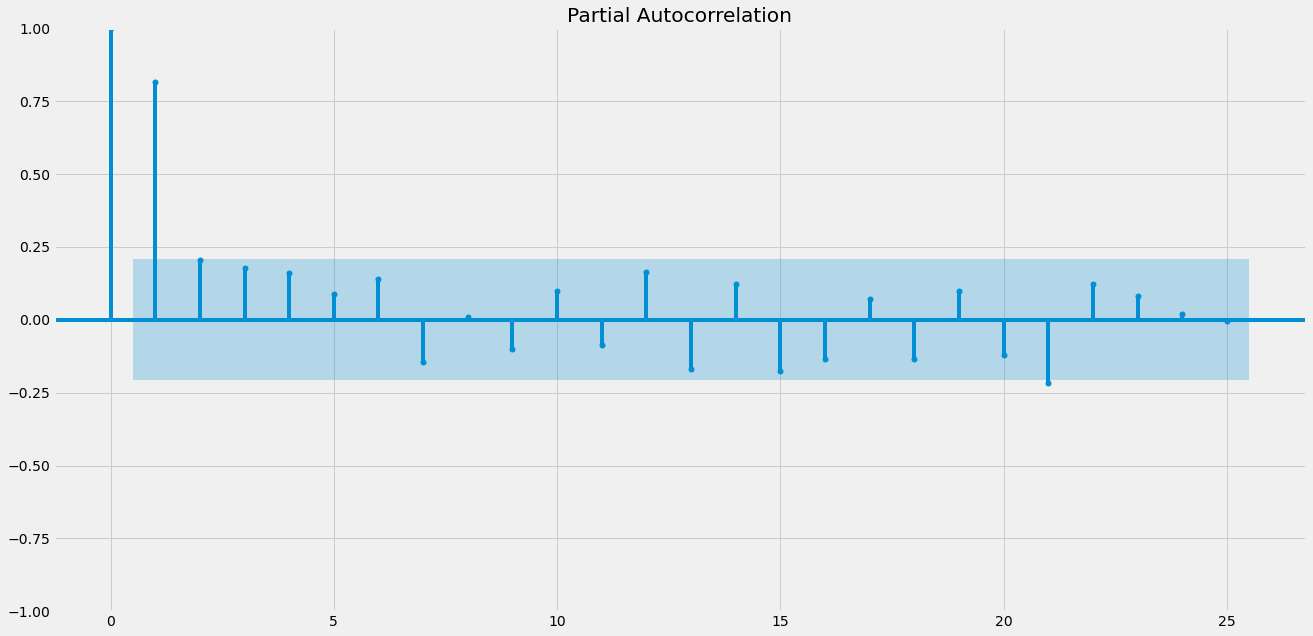

In [28]:
# autocorrelation decreasing over time
# blue band is confidence interval at 95%, meaning we have to worry only on values that step out of blue zone

plot_pacf(xresiduals,lags=25)
print()

In [ ]:
# the trend component is making things difficult as the values in lags 1 stand out of blue zone
# Autocorrelation tells us the observation depends of the previous one
# Partial autocorrelation is de dependent

Dedicated notebook: [https://www.kaggle.com/konradb/practical-time-series-pt-4-prophet](https://www.kaggle.com/konradb/practical-time-series-pt-4-prophet)

Dataset: [https://www.kaggle.com/piantic/autonomous-greenhouse-challengeagc-2nd-2019](https://www.kaggle.com/piantic/autonomous-greenhouse-challengeagc-2nd-2019)

In [29]:
from prophet import Prophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/noone/miniconda3/envs/pytorch

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.2               |     pyhd3eb1b0_0         1.3 MB
    binutils_impl_linux-64-2.33.1|       he6710b0_7         3.7 MB
    binutils_linux-64-2.33.1   |      h9595d00_15          26 KB
    c-ares-1.18.1              |       h7f8727e_0         114 KB
    cftime-1.5.1.1             |   py39hce1f21e_0         207 KB
    convertdate-2.3.2          |     pyhd3eb1b0_0          40 KB
    curl-7.80.0                |       h7f8727e_0          95 KB
    cython-0.29.25             |   py39hdbfa776_0        